In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_seq_items', None)
df = pd.read_csv('/home/ryley/WDK/ML/dataset/komegasst_fp_phll.csv')
#print(df.Case.unique())
#print(df.columns)

In [3]:
def get_b_tensor(df, case):
    df_case = df[df['Case']==case]
    size = len(df_case)
    b = np.empty((size,3,3))
    b[:,0,0] = df_case['DNS_b_11']
    b[:,0,1] = df_case['DNS_b_12']
    b[:,0,2] = df_case['DNS_b_13']
    b[:,1,1] = df_case['DNS_b_22']
    b[:,1,2] = df_case['DNS_b_23']
    b[:,2,2] = df_case['DNS_b_33']
    b[:,1,0] = b[:,0,1]
    b[:,2,0] = b[:,0,2]
    b[:,2,1] = b[:,1,2]
    return b

def realizability_check(b):
    for i in range(0,3):
        for j in range(0,3):
            if i == j:
                if b[i,j] > 2/3 or b[i,j]<-1/3:
                    print(f'REALIZABILITY FAILED: b{i+1}{j+1} = {b[i,j]}')
                #else:
                #    print(f'Realizable: b{i+1}{j+1} = {b[i,j]}')
            else: 
                if b[i,j] > 1/2 or b[i,j]<-1/2:
                    print(f'REALIZABILITY FAILED: b{i+1}{j+1} = {b[i,j]}')
                #else:
                #    print(f'Realizable: b{i+1}{j+1} = {b[i,j]}')
    eigs = np.sort(np.real(np.linalg.eigvals(b)))[::-1]
    
    #print(eigs)
    if eigs[0] < (3*abs(eigs[1]) - eigs[1])/2:
        print(f'REALIZABILITY FAILED: e1 ={eigs[0]}, (3|e2|-e2)/2 = {(3*abs(eigs[1]) - eigs[1])/2}')
    if eigs[0] > (1/3-eigs[1]):
        print(f'REALIZABILITY FAILED: e1 ={eigs[0]}, 1/3-e2 = {(1/3-eigs[1])}')
    

In [4]:
b_test =  np.array([[ 0.2544,  0.9140,  0.2937],
  [ 0.9140,  0.8664, -0.6828],
  [ 0.2937, -0.6828, -1.1208]])
print(f'Sanity check (should fail):')
realizability_check(b_test)

cases=['fp_1000', 'fp_1410', 'fp_2000', 'fp_2540', 'fp_3030', 'fp_3270', 'fp_3630', 'fp_3970', 'fp_4060','case_0p5','case_0p8','case_1p0','case_1p2','case_1p5']

print('\nTesting dataset now:')
for case in cases:
    print(case)
    b = get_b_tensor(df,case)
    for bi in b:
        realizability_check(bi)
print('Done')

Sanity check (should fail):
REALIZABILITY FAILED: b12 = 0.914
REALIZABILITY FAILED: b21 = 0.914
REALIZABILITY FAILED: b22 = 0.8664
REALIZABILITY FAILED: b23 = -0.6828
REALIZABILITY FAILED: b32 = -0.6828
REALIZABILITY FAILED: b33 = -1.1208
REALIZABILITY FAILED: e1 =1.5828366276423245, 1/3-e2 = 0.3867657613508396

Testing dataset now:
fp_1000
fp_1410
fp_2000
fp_2540
fp_3030
fp_3270
fp_3630
fp_3970
fp_4060
case_0p5
case_0p8
case_1p0
case_1p2
case_1p5
Done


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'komegasst_skewness'}>,
        <Axes: title={'center': 'komegasst_I1_1'}>,
        <Axes: title={'center': 'komegasst_I1_2'}>,
        <Axes: title={'center': 'komegasst_I1_3'}>,
        <Axes: title={'center': 'komegasst_I1_4'}>,
        <Axes: title={'center': 'komegasst_I1_5'}>,
        <Axes: title={'center': 'komegasst_I1_6'}>,
        <Axes: title={'center': 'komegasst_I1_7'}>,
        <Axes: title={'center': 'komegasst_I1_8'}>,
        <Axes: title={'center': 'komegasst_I1_9'}>,
        <Axes: title={'center': 'komegasst_I1_10'}>],
       [<Axes: title={'center': 'komegasst_I1_11'}>,
        <Axes: title={'center': 'komegasst_I1_12'}>,
        <Axes: title={'center': 'komegasst_I1_13'}>,
        <Axes: title={'center': 'komegasst_I1_14'}>,
        <Axes: title={'center': 'komegasst_I1_15'}>,
        <Axes: title={'center': 'komegasst_I1_16'}>,
        <Axes: title={'center': 'komegasst_I1_17'}>,
   

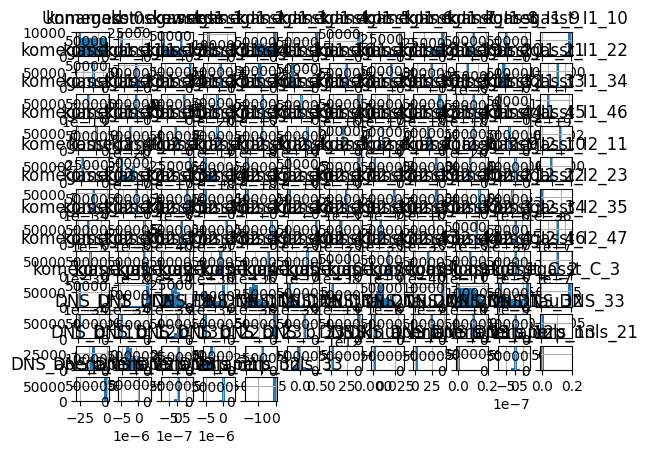

In [ ]:
fig, axs = plt.subplots(nrows=10,ncols=1,figsize=(10,60))
for i,ax in enumerate(axs):
    ax.scatter(df_test['komegasst_C_2'],df_test[f'komegasst_T{i+1}_22'],label=f'komegasst_T{i+1}_22')
    ax.scatter(df_test['komegasst_C_2'],df_test[f'komegasst_T{i+1}_33'], label = f'komegasst_T{i+1}_33')
    ax.legend()
